## 폭설, 폭염, 장마 , 기온


### 2. 일자 분기별로 합치기 

,지점,지점명,일시,평균기온(°C),평균최고기온(°C),평균최저기온(°C),최고기온(°C),최저기온(°C),최고기온 나타난날(yyyymmdd),최저기온 나타난날(yyyymmdd),최심적설(cm),최심신적설(cm),3시간신적설합(cm),최심적설 나타난날(yyyymmdd),최심신적설 나타난날(yyyymmdd)
0,90,속초,2017-01-01,0.8,5.0,-3.3,11.3,-11.2,20170107,20170123,NaN,NaN,NaN,NaN,NaN
1,90,속초,2017-02-01,3.0,7.5,-1.7,14.7,-8.2,20170216,20170210,NaN,NaN,NaN,NaN,NaN
2,90,속초,2017-03-01,7.0,11.4,2.6,18.5,-2.8,20170318,20170308,NaN,NaN,NaN,NaN,NaN
3,90,속초,2017-04-01,14.8,20.1,9.8,30.8,2.6,20170430,20170402,NaN,NaN,NaN,NaN,NaN
4,90,속초,2017-05-01,18.7,23.8,13.8,34.3,9.3,20170519,20170501,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5604,295,남해,2021-07-01,26.1,30.3,22.9,33.0,19.3,20210731,20210701,NaN,NaN,NaN,NaN,NaN
5605,295,남해,2021-08-01,26.1,30.3,23.0,35.5,20.7,20210806,20210827,NaN,NaN,NaN,NaN,NaN
5606,295,남해,2021-09-01,22.2,25.7,19.5,30.1,16.3,20210901,20210923,NaN,NaN,NaN,NaN,NaN
5607,295,남해,2021-10-01,17.2,22.3,13.5,28.9,4.7,20211010,20211018,NaN,NaN,NaN,NaN,NaN


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font", family=font_name)

In [2]:
data1 = pd.read_csv("data/temperature.csv", encoding='cp949')
del data1["최심적설(cm)"], data1["최심신적설(cm)"], data1["3시간신적설합(cm)"],data1["최심적설 나타난날(yyyymmdd)"],data1["최심신적설 나타난날(yyyymmdd)"]
data1

,지점,지점명,일시,평균기온(°C),평균최고기온(°C),평균최저기온(°C),최고기온(°C),최저기온(°C),최고기온 나타난날(yyyymmdd),최저기온 나타난날(yyyymmdd)
0,90,속초,2017-01-01,0.8,5.0,-3.3,11.3,-11.2,20170107,20170123
1,90,속초,2017-02-01,3.0,7.5,-1.7,14.7,-8.2,20170216,20170210
2,90,속초,2017-03-01,7.0,11.4,2.6,18.5,-2.8,20170318,20170308
3,90,속초,2017-04-01,14.8,20.1,9.8,30.8,2.6,20170430,20170402
4,90,속초,2017-05-01,18.7,23.8,13.8,34.3,9.3,20170519,20170501
...,...,...,...,...,...,...,...,...,...,...
5604,295,남해,2021-07-01,26.1,30.3,22.9,33.0,19.3,20210731,20210701
5605,295,남해,2021-08-01,26.1,30.3,23.0,35.5,20.7,20210806,20210827
5606,295,남해,2021-09-01,22.2,25.7,19.5,30.1,16.3,20210901,20210923
5607,295,남해,2021-10-01,17.2,22.3,13.5,28.9,4.7,20211010,20211018


In [55]:
data1.isnull().sum() # 결측치 확인

지점                      0
지점명                     0
일시                      0
평균기온(°C)               99
평균최고기온(°C)             98
평균최저기온(°C)             98
최고기온(°C)                0
최저기온(°C)                0
최고기온 나타난날(yyyymmdd)     0
최저기온 나타난날(yyyymmdd)     0
dtype: int64

In [3]:
data1 = data1.dropna() # 결측치 제거

In [4]:
data1Q17 = data1[(data1['일시']>='2017-01-01') & (data1['일시']<='2017-03-31')] # 17년도 1분기 데이터만 추출
data1Q17 = data1Q17.loc[:, ["평균기온(°C)"]] # 17년도 1분기 데이터 중 기온만 추출
data1Q17.mean() # 전국 17년도 1분기의 평균 기온
df1 = pd.DataFrame(data1Q17.mean())
df1.columns = ["1Q2017"]
df1

,1Q2017
평균기온(°C),2.744561


In [5]:
data2Q17 = data1[(data1['일시']>='2017-04-01') & (data1['일시']<='2017-06-31')] # 17년도 2분기 데이터만 추출
data2Q17 = data2Q17.loc[:, ["평균기온(°C)"]] # 17년도 2분기 데이터 중 기온만 추출
data2Q17.mean() # 전국 17년도 1분기의 평균 기온
df2 = pd.DataFrame(data2Q17.mean())
df2.columns = ["2Q2017"]
df2

,2Q2017
평균기온(°C),17.886667


In [6]:
data3Q17 = data1[(data1['일시']>='2017-07-01') & (data1['일시']<='2017-09-31')] # 17년도 3분기 데이터만 추출
data3Q17 = data3Q17.loc[:, ["평균기온(°C)"]] # 17년도 3분기 데이터 중 기온만 추출
data3Q17.mean() # 전국 17년도 3분기의 평균 기온
df3 = pd.DataFrame(data3Q17.mean())
df3.columns = ["3Q2017"]
df3

,3Q2017
평균기온(°C),24.0


In [7]:
data4Q17 = data1[(data1['일시']>='2017-10-01') & (data1['일시']<='2017-12-31')] # 17년도 4분기 데이터만 추출
data4Q17 = data4Q17.loc[:, ["평균기온(°C)"]] # 17년도 4분기 데이터 중 기온만 추출
data4Q17.mean() # 전국 17년도 4분기의 평균 기온
df4 = pd.DataFrame(data4Q17.mean())
df4.columns = ["4Q2017"]
df4

,4Q2017
평균기온(°C),7.394386


In [8]:
data1Q18 = data1[(data1['일시']>='2018-01-01') & (data1['일시']<='2018-03-31')] # 18년도 1분기 데이터만 추출
data1Q18 = data1Q18.loc[:, ["평균기온(°C)"]] # 18년도 1분기 데이터 중 기온만 추출
data1Q18.mean() # 전국 18년도 1분기의 평균 기온
df5 = pd.DataFrame(data1Q18.mean())
df5.columns = ["1Q2018"]
df5

,1Q2018
평균기온(°C),2.030175


In [9]:
data2Q18 = data1[(data1['일시']>='2018-04-01') & (data1['일시']<='2018-06-31')] # 18년도 2분기 데이터만 추출
data2Q18 = data2Q18.loc[:, ["평균기온(°C)"]] # 18년도 2분기 데이터 중 기온만 추출
data2Q18.mean() # 전국 18년도 2분기의 평균 기온
df6 = pd.DataFrame(data2Q18.mean())
df6.columns = ["2Q2018"]
df6

,2Q2018
평균기온(°C),17.555088


In [10]:
data3Q18 = data1[(data1['일시']>='2018-07-01') & (data1['일시']<='2018-09-31')] # 18년도 3분기 데이터만 추출
data3Q18 = data3Q18.loc[:, ["평균기온(°C)"]] # 18년도 3분기 데이터 중 기온만 추출
data3Q18.mean() # 전국 18년도 3분기의 평균 기온
df7 = pd.DataFrame(data3Q18.mean())
df7.columns = ["3Q2018"]
df7

,3Q2018
평균기온(°C),24.640351


In [11]:
data4Q18 = data1[(data1['일시']>='2018-10-01') & (data1['일시']<='2018-12-31')] # 18년도 4분기 데이터만 추출
data4Q18 = data4Q18.loc[:, ["평균기온(°C)"]] # 18년도 4분기 데이터 중 기온만 추출
data4Q18.mean() # 전국 18년도 4분기의 평균 기온
df8 = pd.DataFrame(data4Q18.mean())
df8.columns = ["4Q2018"]
df8

,4Q2018
평균기온(°C),7.538947


In [12]:
data1Q19 = data1[(data1['일시']>='2019-01-01') & (data1['일시']<='2019-03-31')] # 19년도 1분기 데이터만 추출
data1Q19 = data1Q19.loc[:, ["평균기온(°C)"]] # 19년도 1분기 데이터 중 기온만 추출
data1Q19.mean() # 전국 19년도 1분기의 평균 기온
df9 = pd.DataFrame(data1Q19.mean())
df9.columns = ["1Q2019"]
df9

,1Q2019
평균기온(°C),3.451228


In [13]:
data2Q19 = data1[(data1['일시']>='2019-04-01') & (data1['일시']<='2019-06-31')] # 19년도 2분기 데이터만 추출
data2Q19 = data2Q19.loc[:, ["평균기온(°C)"]] # 19년도 2분기 데이터 중 기온만 추출
data2Q19.mean() # 전국 19년도 2분기의 평균 기온
df10 = pd.DataFrame(data2Q19.mean())
df10.columns = ["2Q2019"]
df10

,2Q2019
평균기온(°C),17.073776


In [14]:
data3Q19 = data1[(data1['일시']>='2019-07-01') & (data1['일시']<='2019-09-31')] # 19년도 3분기 데이터만 추출
data3Q19 = data3Q19.loc[:, ["평균기온(°C)"]] # 19년도 3분기 데이터 중 기온만 추출
data3Q19.mean() # 전국 19년도 3분기의 평균 기온
df11 = pd.DataFrame(data3Q19.mean())
df11.columns = ["3Q2019"]
df11

,3Q2019
평균기온(°C),24.01014


In [15]:
data4Q19 = data1[(data1['일시']>='2019-10-01') & (data1['일시']<='2019-12-31')] # 19년도 4분기 데이터만 추출
data4Q19 = data4Q19.loc[:, ["평균기온(°C)"]] # 19년도 4분기 데이터 중 기온만 추출
data4Q19.mean() # 전국 19년도 4분기의 평균 기온
df12 = pd.DataFrame(data4Q19.mean())
df12.columns = ["4Q2019"]
df12

,4Q2019
평균기온(°C),9.167368


In [16]:
data1Q20 = data1[(data1['일시']>='2020-01-01') & (data1['일시']<='2020-03-31')] # 20년도 1분기 데이터만 추출
data1Q20 = data1Q20.loc[:, ["평균기온(°C)"]] # 20년도 1분기 데이터 중 기온만 추출
data1Q20.mean() # 전국 20년도 1분기의 평균 기온
df13 = pd.DataFrame(data1Q20.mean())
df13.columns = ["1Q2020"]
df13

,1Q2020
평균기온(°C),4.849123


In [17]:
data2Q20 = data1[(data1['일시']>='2020-04-01') & (data1['일시']<='2020-06-31')] # 20년도 2분기 데이터만 추출
data2Q20 = data2Q20.loc[:, ["평균기온(°C)"]] # 20년도 2분기 데이터 중 기온만 추출
data2Q20.mean() # 전국 20년도 2분기의 평균 기온
df14 = pd.DataFrame(data2Q20.mean())
df14.columns = ["2Q2020"]
df14

,2Q2020
평균기온(°C),16.954737


In [18]:
data3Q20 = data1[(data1['일시']>='2020-07-01') & (data1['일시']<='2020-09-31')] # 20년도 3분기 데이터만 추출
data3Q20 = data3Q20.loc[:, ["평균기온(°C)"]] # 20년도 3분기 데이터 중 기온만 추출
data3Q20.mean() # 전국 20년도 3분기의 평균 기온
df15 = pd.DataFrame(data3Q20.mean())
df15.columns = ["3Q2020"]
df15

,3Q2020
평균기온(°C),23.112281


In [19]:
data4Q20 = data1[(data1['일시']>='2020-10-01') & (data1['일시']<='2020-12-31')] # 20년도 4분기 데이터만 추출
data4Q20 = data4Q20.loc[:, ["평균기온(°C)"]] # 20년도 4분기 데이터 중 기온만 추출
data4Q20.mean() # 전국 20년도 4분기의 평균 기온
df16 = pd.DataFrame(data4Q20.mean())
df16.columns = ["4Q2020"]
df16

,4Q2020
평균기온(°C),7.912281


In [20]:
data1Q21 = data1[(data1['일시']>='2021-01-01') & (data1['일시']<='2021-03-31')] # 21년도 1분기 데이터만 추출
data1Q21 = data1Q21.loc[:, ["평균기온(°C)"]] # 21년도 1분기 데이터 중 기온만 추출
data1Q21.mean() # 전국 21년도 1분기의 평균 기온
df17 = pd.DataFrame(data1Q21.mean())
df17.columns = ["1Q2021"]
df17

,1Q2021
평균기온(°C),4.052632


In [21]:
data2Q21 = data1[(data1['일시']>='2021-04-01') & (data1['일시']<='2021-06-31')] # 21년도 2분기 데이터만 추출
data2Q21 = data2Q21.loc[:, ["평균기온(°C)"]] # 21년도 2분기 데이터 중 기온만 추출
data2Q21.mean() # 전국 21년도 2분기의 평균 기온
df18 = pd.DataFrame(data2Q21.mean())
df18.columns = ["2Q2021"]
df18

,2Q2021
평균기온(°C),17.236268


In [22]:
data3Q21 = data1[(data1['일시']>='2021-07-01') & (data1['일시']<='2021-09-31')] # 21년도 3분기 데이터만 추출
data3Q21 = data3Q21.loc[:, ["평균기온(°C)"]] # 21년도 3분기 데이터 중 기온만 추출
data3Q21.mean() # 전국 21년도 3분기의 평균 기온
df19 = pd.DataFrame(data3Q21.mean())
df19.columns = ["3Q2021"]
df19

,3Q2021
평균기온(°C),24.183158


In [23]:
df_list = [df1.T, df2.T, df3.T,df4.T, df5.T, df6.T,df7.T, df8.T, df9.T,df10.T, df11.T, df12.T, df13.T, df14.T, df15.T, df16.T, df17.T, df18.T, df19.T]
final = pd.concat(df_list)


final.T

,1Q2017,2Q2017,3Q2017,4Q2017,1Q2018,2Q2018,3Q2018,4Q2018,1Q2019,2Q2019,3Q2019,4Q2019,1Q2020,2Q2020,3Q2020,4Q2020,1Q2021,2Q2021,3Q2021
평균기온(°C),2.744561,17.886667,24.0,7.394386,2.030175,17.555088,24.640351,7.538947,3.451228,17.073776,24.01014,9.167368,4.849123,16.954737,23.112281,7.912281,4.052632,17.236268,24.183158


In [25]:
########## 체크포인트 추가했습니다
final2 = final.T
final2

,1Q2017,2Q2017,3Q2017,4Q2017,1Q2018,2Q2018,3Q2018,4Q2018,1Q2019,2Q2019,3Q2019,4Q2019,1Q2020,2Q2020,3Q2020,4Q2020,1Q2021,2Q2021,3Q2021
평균기온(°C),2.744561,17.886667,24.0,7.394386,2.030175,17.555088,24.640351,7.538947,3.451228,17.073776,24.01014,9.167368,4.849123,16.954737,23.112281,7.912281,4.052632,17.236268,24.183158


In [26]:
final2.to_csv("checkpoint/temperature_checkpoint.csv", encoding= "utf=8")

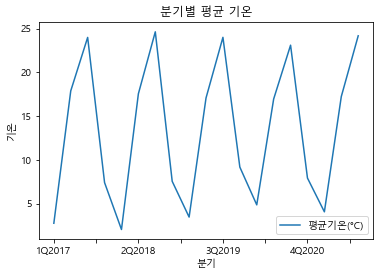

In [87]:
final.plot()
plt.title("분기별 평균 기온")
plt.xlabel("분기")
plt.ylabel("기온")
plt.show()

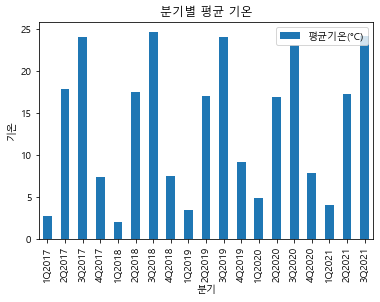

In [100]:
final.plot.bar()
plt.title("분기별 평균 기온")
plt.xlabel("분기")
#plt.xticks(rotation=90)
#plt.set_xticklabels (xlabels, rotation =90)
plt.xticks(rotation =90)
plt.ylabel("기온")

plt.show()